# CAP 6618 - Machine Learning for Computer Vision

Christian Garbin - experiments for programming project 2

**IMPORTANT**: modifications done to this code assume Python 3.

# Programming Project 2
See guidelines on Canvas for details.

In [1]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

# Step 1: Setup

First, make sure that the files below have been downloaded from https://github.com/MichalDanielDobrzanski/DeepLearningPython35 
and saved in the same folder as this notebook.

## Step 2: Load (and split) the MNIST dataset

Load and inspect the dataset.

In [2]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)

## Step 2a: Inspect the dataset

In [3]:
import numpy as np
import copy

# A somewhat limited, but good enough for this notebook, object inspection function
def inspect_object(description, obj):
    print(description)
    t = type(obj)

    if t is zip:
        print("This is a zip")
        l = list(copy.deepcopy(obj))  # to not change the original object
        print("  It has {} elements".format(len(l)))
        print("  The type of the first element is {}". format(type(l[0])))
        inspect_object("First element of the zip", l[0])
    elif t is list:
        print("This is a list")
        print("  It has {} elements".format(len(obj)))
        print("  The type of the first element is {}". format(type(obj[0])))
        inspect_object("First element of the list", obj[0])
    elif t is np.ndarray:
        print("This is a numpy.ndarray with shape {} = {} elements - max value {}, mean value {}".format(
            obj.shape, obj.size, obj.max(), obj.mean()))
        if obj.size < 20:
            print(obj)
        else:
            print("  Not printing the array because it's large")
        inspect_object("First element of the array", obj[0])
    elif t is tuple:
        print("This is a tuple with {} elements".format(len(obj)))
        if len(obj) == 2:  # dissect the most common case
            a, b = obj
            inspect_object("\n(1 of 2) First element of the tuple", a)
            inspect_object("\n(2 of 2) Second element of the tuple", b)
        else:
            inspect_object("\nFirst element of the tuple", obj[0])
    else:
        print("This is a {}".format(t))
        print("  Its value is {}".format(obj))


Show what we have in the dataset

In [4]:
inspect_object("\nTraining data\n-----", training_data)
inspect_object("\n\nTest data\n-----", list(test_data))
inspect_object("\n\nValidation data\n-----", list(validation_data))


Training data
-----
This is a list
  It has 50000 elements
  The type of the first element is <class 'tuple'>
First element of the list
This is a tuple with 2 elements

(1 of 2) First element of the tuple
This is a numpy.ndarray with shape (784, 1) = 784 elements - max value 0.99609375, mean value 0.13714225590229034
  Not printing the array because it's large
First element of the array
This is a numpy.ndarray with shape (1,) = 1 elements - max value 0.0, mean value 0.0
[0.]
First element of the array
This is a <class 'numpy.float32'>
  Its value is 0.0

(2 of 2) Second element of the tuple
This is a numpy.ndarray with shape (10, 1) = 10 elements - max value 1.0, mean value 0.1
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
First element of the array
This is a numpy.ndarray with shape (1,) = 1 elements - max value 0.0, mean value 0.0
[0.]
First element of the array
This is a <class 'numpy.float64'>
  Its value is 0.0


Test data
-----
This is a list
  It has 10000 elemen

A few observations from the inspection:

* The pixels in the image are already normalized.
* The training labels are hot-encoded.
* The validation and test labels are not.

# Step 3: Set up a first network with three layers 

Input layer: 784 neurons<br>
Hidden layer: 30 neurons<br>
Output layer: 10 neurons

In [5]:
import network
net1 = network.Network([784, 30, 10])

# Step 4: Train the network using SGD  

30 epochs, mini-batch size = 10, and eta = 3.0

In [6]:
%%time

# Reload data before training because it's a zip (can't be iterated over twice)
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

# Time with j % 3 in network.py (evaluate every third epoch)
# CPU times: user 10min 10s, sys: 1min 24s, total: 11min 34s
# Wall time: 2min 56s

# Time without j % 3
# CPU times: user 10min 35s, sys: 1min 33s, total: 12min 9s
# Wall time: 3min 17s

# Test with no test_data (no evaluation for any epoch)
# CPU times: user 10min 26s, sys: 1min 34s, total: 12min 1s
# Wall time: 3min 5s

# Conclusion: the evaluation step is not the critical path, so leave it in

epochs = 30
mini_batch_size = 10
eta = 3.0
net1.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)

Epoch 0 : 8969 / 10000
Epoch 1 : 9169 / 10000
Epoch 2 : 9317 / 10000
Epoch 3 : 9352 / 10000
Epoch 4 : 9380 / 10000
Epoch 5 : 9410 / 10000
Epoch 6 : 9420 / 10000
Epoch 7 : 9415 / 10000
Epoch 8 : 9419 / 10000
Epoch 9 : 9426 / 10000
Epoch 10 : 9434 / 10000
Epoch 11 : 9449 / 10000
Epoch 12 : 9477 / 10000
Epoch 13 : 9480 / 10000
Epoch 14 : 9468 / 10000
Epoch 15 : 9425 / 10000
Epoch 16 : 9452 / 10000
Epoch 17 : 9480 / 10000
Epoch 18 : 9484 / 10000
Epoch 19 : 9471 / 10000
Epoch 20 : 9493 / 10000
Epoch 21 : 9452 / 10000
Epoch 22 : 9470 / 10000
Epoch 23 : 9464 / 10000
Epoch 24 : 9493 / 10000
Epoch 25 : 9486 / 10000
Epoch 26 : 9491 / 10000
Epoch 27 : 9482 / 10000
Epoch 28 : 9480 / 10000
Epoch 29 : 9483 / 10000
CPU times: user 9min 57s, sys: 1min 26s, total: 11min 23s
Wall time: 2min 53s


## Step 4a: Analysis and Experiments

This network performed reasonably well, so we will leave it alone for now and use it as benchmark.

# Step 5: Set up a second network with three layers 

Input layer: 784 neurons<br>
Hidden layer: 100 neurons<br>
Output layer: 10 neurons

In [7]:
import network
net2 = network.Network([784, 100, 10])

# Step 6: Train the network using SGD  

30 epochs, mini-batch size = 10, and eta = 3.0

In [8]:
%%time

# Reload data before training because its a zip (can't be iterated over twice)
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

epochs = 30
mini_batch_size = 10
eta = 3.0
net2.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)

Epoch 0 : 6214 / 10000
Epoch 1 : 7195 / 10000
Epoch 2 : 7329 / 10000
Epoch 3 : 7419 / 10000
Epoch 4 : 7441 / 10000
Epoch 5 : 7454 / 10000
Epoch 6 : 7496 / 10000
Epoch 7 : 7476 / 10000
Epoch 8 : 7506 / 10000
Epoch 9 : 8620 / 10000
Epoch 10 : 8636 / 10000
Epoch 11 : 8643 / 10000
Epoch 12 : 8640 / 10000
Epoch 13 : 8637 / 10000
Epoch 14 : 8629 / 10000
Epoch 15 : 8652 / 10000
Epoch 16 : 8646 / 10000
Epoch 17 : 8650 / 10000
Epoch 18 : 8658 / 10000
Epoch 19 : 8658 / 10000
Epoch 20 : 8644 / 10000
Epoch 21 : 8648 / 10000
Epoch 22 : 8662 / 10000
Epoch 23 : 8666 / 10000
Epoch 24 : 8674 / 10000
Epoch 25 : 8662 / 10000
Epoch 26 : 8680 / 10000
Epoch 27 : 8668 / 10000
Epoch 28 : 8675 / 10000
Epoch 29 : 8686 / 10000
CPU times: user 18min 56s, sys: 2min 33s, total: 21min 30s
Wall time: 5min 25s


## Step 6a: Analysis and Experiments

The result above is significantly worse than the results reported in  Nielsen's book.

> ...this improves the results to 96.59 percent. At least in this case, using more hidden neurons helps us get better results.

However, the book also has a side note:

> Reader feedback indicates quite some variation in results for this experiment, and some training runs give results quite a bit worse. Using the techniques introduced in chapter 3 will greatly reduce the variation in performance across different training runs for our networks.

I guess I'm one of those readers...

It seems that it's taking longer for this network to converge.

## Varying results

While testing the network above, I noticed that its accuracy varies significantly from one run to the next.

This is illustrated in the cell below, which trains the network three times (for a few epochs, to save time).

Although "illustrated" is somewhat dangerous to use together with "varying". In a different run, or a different environment, the results may not be so disparate.

In [9]:
epochs = 5
mini_batch_size = 10
eta = 10.0

for i in range(3):
    print("\nTraining round #{}".format(i+1))
    training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
    n = network.Network([784, 100, 10])
    n.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)


Training round #1
Epoch 0 : 3541 / 10000
Epoch 1 : 3446 / 10000
Epoch 2 : 3962 / 10000
Epoch 3 : 3588 / 10000
Epoch 4 : 4157 / 10000

Training round #2
Epoch 0 : 7067 / 10000
Epoch 1 : 7438 / 10000
Epoch 2 : 7797 / 10000
Epoch 3 : 7826 / 10000
Epoch 4 : 7955 / 10000

Training round #3
Epoch 0 : 6888 / 10000
Epoch 1 : 8384 / 10000
Epoch 2 : 8481 / 10000
Epoch 3 : 8564 / 10000
Epoch 4 : 8722 / 10000


This is likely caused by the weight initialization method. It uses random values:

```
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
```

Each run of the network starts with a significantly different set of weights.

It may eventually converge to a similar accuracy, but it may need more than the number of epochs we are using here.

With that in mind, the next sections conduct some experiments. Their results may be different if we perform them again, but since we are looking at the behavior, not exact numbers, they are enough for that purpose.

Also noticed that adding `numpy.random.seed(42)` to make the results reproducible (or at least help a bit with that) makes a difference. Without it, the network in the next section achieves over 90% accuracy. Adding `seed()` brings its accuracy down to the numbers we see below. It is another indication that the network is sensitive to weight initialization (as the use of `numpy.randn()` shown above indicates).

## Higher learning rate

As a first experiment to try to improve it, we will attempt a higher learning rate. The idea is that it will converge faster, reaching a higher accuracy.

In [10]:
%%time

# Reload data before training because it's a zip (can't be iterated over twice)
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

# IMPORTANT: even though it's the same network architecture, must create a new one. Using the object
# from the previous test would carryover the internal variables of the  network at that point,
# e.g. initial weight values for this test would be the trained weight values from the previous run.
net2 = network.Network([784, 100, 10])

epochs = 30
mini_batch_size = 10
eta = 10.0
net2.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)

Epoch 0 : 6201 / 10000
Epoch 1 : 8369 / 10000
Epoch 2 : 8395 / 10000
Epoch 3 : 8320 / 10000
Epoch 4 : 8609 / 10000
Epoch 5 : 8599 / 10000
Epoch 6 : 8665 / 10000
Epoch 7 : 8746 / 10000
Epoch 8 : 8648 / 10000
Epoch 9 : 8762 / 10000
Epoch 10 : 8779 / 10000
Epoch 11 : 8847 / 10000
Epoch 12 : 8753 / 10000
Epoch 13 : 8718 / 10000
Epoch 14 : 8866 / 10000
Epoch 15 : 8705 / 10000
Epoch 16 : 8754 / 10000
Epoch 17 : 8790 / 10000
Epoch 18 : 8744 / 10000
Epoch 19 : 8796 / 10000
Epoch 20 : 8871 / 10000
Epoch 21 : 8895 / 10000
Epoch 22 : 8659 / 10000
Epoch 23 : 8735 / 10000
Epoch 24 : 8900 / 10000
Epoch 25 : 8933 / 10000
Epoch 26 : 8914 / 10000
Epoch 27 : 9056 / 10000
Epoch 28 : 8940 / 10000
Epoch 29 : 8892 / 10000
CPU times: user 18min 57s, sys: 2min 35s, total: 21min 33s
Wall time: 5min 26s


Accuracy is now lower than before.

## Even higher learning rate

Try again with a higher rate.

In [11]:
%%time

# Reload data before training because it's a zip (can't be iterated over twice)
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

# IMPORTANT: even though it's the same network architecture, must create a new one. Using the object
# from the previous test would carryover the internal variables of the  network at that point,
# e.g. initial weight values for this test would be the trained weight values from the previous run.
net2 = network.Network([784, 100, 10])

epochs = 30
mini_batch_size = 10
eta = 20.0
net2.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)

Epoch 0 : 2111 / 10000
Epoch 1 : 2235 / 10000
Epoch 2 : 1964 / 10000
Epoch 3 : 1877 / 10000
Epoch 4 : 1677 / 10000
Epoch 5 : 1830 / 10000
Epoch 6 : 1765 / 10000
Epoch 7 : 1810 / 10000
Epoch 8 : 1763 / 10000
Epoch 9 : 1633 / 10000
Epoch 10 : 1747 / 10000
Epoch 11 : 1740 / 10000
Epoch 12 : 1879 / 10000
Epoch 13 : 2083 / 10000
Epoch 14 : 1988 / 10000
Epoch 15 : 2066 / 10000
Epoch 16 : 2077 / 10000
Epoch 17 : 1992 / 10000
Epoch 18 : 2052 / 10000
Epoch 19 : 2231 / 10000
Epoch 20 : 2264 / 10000
Epoch 21 : 2109 / 10000
Epoch 22 : 2101 / 10000
Epoch 23 : 2357 / 10000
Epoch 24 : 2218 / 10000
Epoch 25 : 2064 / 10000
Epoch 26 : 2273 / 10000
Epoch 27 : 2289 / 10000
Epoch 28 : 2189 / 10000
Epoch 29 : 2197 / 10000
CPU times: user 18min 52s, sys: 2min 32s, total: 21min 24s
Wall time: 5min 24s


That was a step too far. Let's try something in between.

## Back down the learning rate

Lower the learning rate.

And this time try fewer epochs to see if it's going in the right direction.

In [12]:
%%time

# Reload data before training because it's a zip (can't be iterated over twice)
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

# IMPORTANT: even though it's the same network architecture, must create a new one. Using the object
# from the previous test would carryover the internal variables of the  network at that point,
# e.g. initial weight values for this test would be the trained weight values from the previous run.
net2 = network.Network([784, 100, 10])

epochs = 10
mini_batch_size = 10
eta = 15.0
net2.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)

Epoch 0 : 3542 / 10000
Epoch 1 : 4197 / 10000
Epoch 2 : 4886 / 10000
Epoch 3 : 4523 / 10000
Epoch 4 : 4371 / 10000
Epoch 5 : 4788 / 10000
Epoch 6 : 4736 / 10000
Epoch 7 : 4734 / 10000
Epoch 8 : 4549 / 10000
Epoch 9 : 4338 / 10000
CPU times: user 6min 17s, sys: 51.1 s, total: 7min 8s
Wall time: 1min 48s


It seems that anything above `eta = 10.0` is worse. Try a value a bit lower than that to confirm.

## eta=9.0

From the experiments above, it looks the optimal learning rate is around 10.0. 

Investigate some values around it to confirm, starting with 9.0.

In [13]:
%%time

# Reload data before training because it's a zip (can't be iterated over twice)
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

# IMPORTANT: even though it's the same network architecture, must create a new one. Using the object
# from the previous test would carryover the internal variables of the  network at that point,
# e.g. initial weight values for this test would be the trained weight values from the previous run.
net2 = network.Network([784, 100, 10])

epochs = 30
mini_batch_size = 10
eta = 9.0
net2.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)

Epoch 0 : 6743 / 10000
Epoch 1 : 6706 / 10000
Epoch 2 : 6843 / 10000
Epoch 3 : 6817 / 10000
Epoch 4 : 7154 / 10000
Epoch 5 : 6810 / 10000
Epoch 6 : 6908 / 10000
Epoch 7 : 7001 / 10000
Epoch 8 : 7039 / 10000
Epoch 9 : 7105 / 10000
Epoch 10 : 7129 / 10000
Epoch 11 : 7076 / 10000
Epoch 12 : 7341 / 10000
Epoch 13 : 7206 / 10000
Epoch 14 : 7149 / 10000
Epoch 15 : 7211 / 10000
Epoch 16 : 7294 / 10000
Epoch 17 : 7497 / 10000
Epoch 18 : 7209 / 10000
Epoch 19 : 7333 / 10000
Epoch 20 : 7261 / 10000
Epoch 21 : 7326 / 10000
Epoch 22 : 7184 / 10000
Epoch 23 : 7292 / 10000
Epoch 24 : 7000 / 10000
Epoch 25 : 7151 / 10000
Epoch 26 : 7141 / 10000
Epoch 27 : 7109 / 10000
Epoch 28 : 7249 / 10000
Epoch 29 : 7190 / 10000
CPU times: user 18min 47s, sys: 2min 31s, total: 21min 19s
Wall time: 5min 22s


It got better. Try a lower value to see if it can get better in this direction.

## eta=8.0

Lowering from 10.0 to 9.0 improved. Check if lowering again improves it further.

In [14]:
%%time

# Reload data before training because it's a zip (can't be iterated over twice)
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

# IMPORTANT: even though it's the same network architecture, must create a new one. Using the object
# from the previous test would carryover the internal variables of the  network at that point,
# e.g. initial weight values for this test would be the trained weight values from the previous run.
net2 = network.Network([784, 100, 10])

epochs = 30
mini_batch_size = 10
eta = 8.0
net2.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)

Epoch 0 : 7300 / 10000
Epoch 1 : 7400 / 10000
Epoch 2 : 7585 / 10000
Epoch 3 : 7605 / 10000
Epoch 4 : 7751 / 10000
Epoch 5 : 8000 / 10000
Epoch 6 : 8432 / 10000
Epoch 7 : 8441 / 10000
Epoch 8 : 8513 / 10000
Epoch 9 : 8483 / 10000
Epoch 10 : 8916 / 10000
Epoch 11 : 9562 / 10000
Epoch 12 : 9545 / 10000
Epoch 13 : 9564 / 10000
Epoch 14 : 9583 / 10000
Epoch 15 : 9600 / 10000
Epoch 16 : 9577 / 10000
Epoch 17 : 9560 / 10000
Epoch 18 : 9619 / 10000
Epoch 19 : 9595 / 10000
Epoch 20 : 9590 / 10000
Epoch 21 : 9635 / 10000
Epoch 22 : 9634 / 10000
Epoch 23 : 9600 / 10000
Epoch 24 : 9620 / 10000
Epoch 25 : 9657 / 10000
Epoch 26 : 9614 / 10000
Epoch 27 : 9606 / 10000
Epoch 28 : 9622 / 10000
Epoch 29 : 9602 / 10000
CPU times: user 18min 49s, sys: 2min 32s, total: 21min 21s
Wall time: 5min 23s


## Conclusion

It looks like a value between `eta = 8.0` and `eta = 9.0` is the best we can do in this network.

# Step 7: Set up a third network with only two layers 

Input layer: 784 neurons<br>
Output layer: 10 neurons

In [15]:
import network
net3 = network.Network([784, 10])

# Step 8: Train the network using SGD  

30 epochs, mini-batch size = 10, and eta = 3.0

In [16]:
%%time

# Reload data before training because it's a zip (can't be iterated over twice)
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

epochs = 30
mini_batch_size = 10
eta = 3.0
net3.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)

Epoch 0 : 5621 / 10000
Epoch 1 : 5685 / 10000
Epoch 2 : 6581 / 10000
Epoch 3 : 6607 / 10000
Epoch 4 : 6598 / 10000
Epoch 5 : 6628 / 10000
Epoch 6 : 6606 / 10000
Epoch 7 : 6628 / 10000
Epoch 8 : 6618 / 10000
Epoch 9 : 6644 / 10000
Epoch 10 : 6639 / 10000
Epoch 11 : 6643 / 10000
Epoch 12 : 6662 / 10000
Epoch 13 : 6638 / 10000
Epoch 14 : 6650 / 10000
Epoch 15 : 6654 / 10000
Epoch 16 : 6659 / 10000
Epoch 17 : 6662 / 10000
Epoch 18 : 6656 / 10000
Epoch 19 : 6659 / 10000
Epoch 20 : 6651 / 10000
Epoch 21 : 6641 / 10000
Epoch 22 : 6662 / 10000
Epoch 23 : 6728 / 10000
Epoch 24 : 7455 / 10000
Epoch 25 : 7454 / 10000
Epoch 26 : 7474 / 10000
Epoch 27 : 7458 / 10000
Epoch 28 : 7476 / 10000
Epoch 29 : 7474 / 10000
CPU times: user 1min 4s, sys: 303 ms, total: 1min 4s
Wall time: 1min 4s


### Step 8a: Analysis and Experiments

Since the accuracy is on the low side, try a higher learning rate.

In [17]:
%%time

# Reload data before training because it's a zip (can't be iterated over twice)
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

# IMPORTANT: even though it's the same network architecture, must create a new one. Using the object
# from the previous test would carryover the internal variables of the  network at that point,
# e.g. initial weight values for this test would be the trained weight values from the previous run.
net3 = network.Network([784, 10])

epochs = 30
mini_batch_size = 10
eta = 12.0
net3.SGD(training_data, epochs, mini_batch_size, eta, test_data=test_data)

Epoch 0 : 4660 / 10000
Epoch 1 : 4754 / 10000
Epoch 2 : 4862 / 10000
Epoch 3 : 4928 / 10000
Epoch 4 : 5128 / 10000
Epoch 5 : 5938 / 10000
Epoch 6 : 5970 / 10000
Epoch 7 : 5988 / 10000
Epoch 8 : 6117 / 10000
Epoch 9 : 6056 / 10000
Epoch 10 : 6025 / 10000
Epoch 11 : 6172 / 10000
Epoch 12 : 6029 / 10000
Epoch 13 : 6077 / 10000
Epoch 14 : 6102 / 10000
Epoch 15 : 6196 / 10000
Epoch 16 : 6149 / 10000
Epoch 17 : 6133 / 10000
Epoch 18 : 6158 / 10000
Epoch 19 : 6219 / 10000
Epoch 20 : 6236 / 10000
Epoch 21 : 6234 / 10000
Epoch 22 : 6201 / 10000
Epoch 23 : 6240 / 10000
Epoch 24 : 6254 / 10000
Epoch 25 : 6212 / 10000
Epoch 26 : 6156 / 10000
Epoch 27 : 6187 / 10000
Epoch 28 : 6206 / 10000
Epoch 29 : 6172 / 10000
CPU times: user 1min 4s, sys: 269 ms, total: 1min 4s
Wall time: 1min 4s


Even with a high learning rate the accuracy is low. It is in the same range we had when the learning rate was low.

It looks like this network simply doesn't have enough representation capacity for this dataset to go beyond this range.

# Step 9: Classification using a built-in neural network from scikit-learn

## Step 9a: load and inspect the dataset

Load MNIST dataset in a sklearn-friendly format (from A. Géron's book).

In [18]:
# From Geron 

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import os

# Standard library
import random

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    # No need to save pics
    pass

In [19]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

Split the dataset into training and test data and shuffle the training data to help classifiers that can get stuck a local minimum.

**IMPORTANT**: In the code below we are using the first 50,000 elements as the train set to match Nielsen's code. If we train with all 60,000 elements we would be giving this classifier an unfair edge over Nielsen's classifiers tested above.

Before we slice the 50,000 elements we need to shuffle the complete train set we get from MNIST. Otherwise we will not be sure we are getting the correct distribution for all digits (shuffling doesn't guarantee that either - we will check with a histogram below).

The test data is still the last 10,000 elements, as defined in the MNIST dataset. We currently don't use the elements in the [50,001-60,000] range. They would be used as a validation set.


In [20]:
X, y = mnist["data"], mnist["target"]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Shuffle the complete train set
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Now extract the first 50,000
X_train, y_train = X_train[:50000], y_train[:50000]

Inspect the dataset contents

In [21]:
inspect_object("\nX_train\n-----", X_train)
inspect_object("\n\ny_train\n-----", y_train)
inspect_object("\n\nX_text\n-----", X_test)
inspect_object("\n\ny_test\n-----", y_test)


X_train
-----
This is a numpy.ndarray with shape (50000, 784) = 39200000 elements - max value 255.0, mean value 33.29885793367347
  Not printing the array because it's large
First element of the array
This is a numpy.ndarray with shape (784,) = 784 elements - max value 255.0, mean value 20.427295918367346
  Not printing the array because it's large
First element of the array
This is a <class 'numpy.float64'>
  Its value is 0.0


y_train
-----
This is a numpy.ndarray with shape (50000,) = 50000 elements - max value 9, mean value 4.46016
  Not printing the array because it's large
First element of the array
This is a <class 'numpy.int8'>
  Its value is 1


X_text
-----
This is a numpy.ndarray with shape (10000, 784) = 7840000 elements - max value 255.0, mean value 33.791224489795916
  Not printing the array because it's large
First element of the array
This is a numpy.ndarray with shape (784,) = 784 elements - max value 255.0, mean value 47.21173469387755
  Not printing the array becaus

Check that we have a good distribution for all digits.

What we are looking for: about the same distribution of digits in the train and test set.

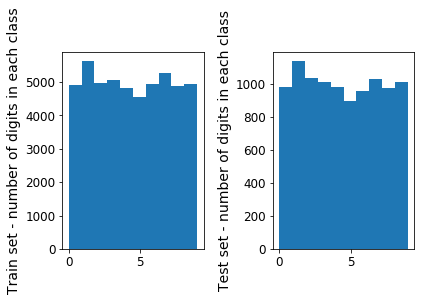

In [22]:
plt.subplot(121); plt.hist(y_train); plt.ylabel('Train set - number of digits in each class')
plt.subplot(122); plt.hist(y_test); plt.ylabel('Test set - number of digits in each class')
plt.tight_layout()
plt.show()

## Step 9b: 30 neurons in the hidden layer

In [23]:
%%time

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(30,), activation="logistic", solver="sgd", alpha=0, batch_size=10, max_iter=30, verbose=True)
fit_results = clf.fit(X_train, y_train)

# Check:
#  Turn off momentum

print(fit_results)  # must explicitly print because of %%time

Iteration 1, loss = 0.99334600
Iteration 2, loss = 0.63490822
Iteration 3, loss = 0.59732142
Iteration 4, loss = 0.58117939
Iteration 5, loss = 0.53209930
Iteration 6, loss = 0.50404391
Iteration 7, loss = 0.51194670
Iteration 8, loss = 0.51191745
Iteration 9, loss = 0.49157505
Iteration 10, loss = 0.48038426
Iteration 11, loss = 0.47626838
Iteration 12, loss = 0.48514311
Iteration 13, loss = 0.50707610
Iteration 14, loss = 0.50824714
Iteration 15, loss = 0.48658379
Iteration 16, loss = 0.47780768
Iteration 17, loss = 0.48340429
Iteration 18, loss = 0.45106580
Iteration 19, loss = 0.43135839
Iteration 20, loss = 0.45545184
Iteration 21, loss = 0.45065506
Iteration 22, loss = 0.46412175
Iteration 23, loss = 0.43301812
Iteration 24, loss = 0.43914636
Iteration 25, loss = 0.42105670
Iteration 26, loss = 0.42633173
Iteration 27, loss = 0.40124111
Iteration 28, loss = 0.45041884
Iteration 29, loss = 0.42703379
Iteration 30, loss = 0.41126832
MLPClassifier(activation='logistic', alpha=0, bat

/Users/cgarbin/fau/cap6618/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8821

## Step 9c: 100 neurons in the hidden layer

In [25]:
%%time

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,), activation="logistic", solver="sgd", alpha=0, batch_size=10, max_iter=30, verbose=True)
fit_results = clf.fit(X_train, y_train)

# Check:
#  Turn off momentum

print(fit_results)  # must explicitly print because of %%time

Iteration 1, loss = 0.68428837
Iteration 2, loss = 0.46354329
Iteration 3, loss = 0.43010842
Iteration 4, loss = 0.42461680
Iteration 5, loss = 0.40872894
Iteration 6, loss = 0.40468090
Iteration 7, loss = 0.38880387
Iteration 8, loss = 0.37933068
Iteration 9, loss = 0.37007991
Iteration 10, loss = 0.36352360
Iteration 11, loss = 0.36126393
Iteration 12, loss = 0.37309771
Iteration 13, loss = 0.35262089
Iteration 14, loss = 0.35409925
Iteration 15, loss = 0.35294832
Iteration 16, loss = 0.33653540
Iteration 17, loss = 0.32901280
Iteration 18, loss = 0.31764981
Iteration 19, loss = 0.31136596
Iteration 20, loss = 0.31133030
Iteration 21, loss = 0.31592339
Iteration 22, loss = 0.30800188
Iteration 23, loss = 0.30701879
Iteration 24, loss = 0.30570779
Iteration 25, loss = 0.30434285
Iteration 26, loss = 0.29505947
Iteration 27, loss = 0.29182182
Iteration 28, loss = 0.29142902
Iteration 29, loss = 0.28933034
Iteration 30, loss = 0.29483133
MLPClassifier(activation='logistic', alpha=0, bat

/Users/cgarbin/fau/cap6618/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9093

## Step 9d: Scale the data

Nielsen's MNIST dataset is scaled. Check if this classifier improves if we also scale the data.

In [27]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

clf = MLPClassifier(hidden_layer_sizes=(100,), activation="logistic", solver="sgd", alpha=0, batch_size=10, max_iter=30, verbose=True)
fit_results = clf.fit(X_train_scaled, y_train)

print(fit_results)  # must explicitly print because of %%time

Iteration 1, loss = 0.66192274
Iteration 2, loss = 0.30563759
Iteration 3, loss = 0.25847513
Iteration 4, loss = 0.23202599
Iteration 5, loss = 0.21286834
Iteration 6, loss = 0.19740597
Iteration 7, loss = 0.18467613
Iteration 8, loss = 0.17338370
Iteration 9, loss = 0.16355954
Iteration 10, loss = 0.15470910
Iteration 11, loss = 0.14671616
Iteration 12, loss = 0.13937744
Iteration 13, loss = 0.13265760
Iteration 14, loss = 0.12647840
Iteration 15, loss = 0.12087223
Iteration 16, loss = 0.11555759
Iteration 17, loss = 0.11052733
Iteration 18, loss = 0.10595033
Iteration 19, loss = 0.10174277
Iteration 20, loss = 0.09757501
Iteration 21, loss = 0.09380729
Iteration 22, loss = 0.09018419
Iteration 23, loss = 0.08670448
Iteration 24, loss = 0.08350993
Iteration 25, loss = 0.08042404
Iteration 26, loss = 0.07751407
Iteration 27, loss = 0.07483662
Iteration 28, loss = 0.07212204
Iteration 29, loss = 0.06960266
Iteration 30, loss = 0.06714081
MLPClassifier(activation='logistic', alpha=0, bat

/Users/cgarbin/fau/cap6618/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [28]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8858

It decreased, but not by much. At this scale, it can be just random values changing it in one direction or another.

## Step 9e: without momentum

`MLPClassifier` uses momentum of 0.9 by default. Nielsen's classifier doens't have momentum.

This test turns off momentum to make a closer comparison between the two.

In [31]:
%%time

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), activation="logistic", solver="sgd", alpha=0, batch_size=10, max_iter=30, verbose=True, momentum=0.0)
fit_results = clf.fit(X_train, y_train)

print(fit_results)  # must explicitly print because of %%time

Iteration 1, loss = 0.98516463
Iteration 2, loss = 0.48908903
Iteration 3, loss = 0.38378049
Iteration 4, loss = 0.33238902
Iteration 5, loss = 0.30097320
Iteration 6, loss = 0.27923571
Iteration 7, loss = 0.26258342
Iteration 8, loss = 0.24930881
Iteration 9, loss = 0.23874333
Iteration 10, loss = 0.22858407
Iteration 11, loss = 0.22100324
Iteration 12, loss = 0.21300596
Iteration 13, loss = 0.20839692
Iteration 14, loss = 0.19854166
Iteration 15, loss = 0.19286079
Iteration 16, loss = 0.19027903
Iteration 17, loss = 0.18072812
Iteration 18, loss = 0.17741561
Iteration 19, loss = 0.17358059
Iteration 20, loss = 0.16976155
Iteration 21, loss = 0.16500668
Iteration 22, loss = 0.16047686
Iteration 23, loss = 0.16032744
Iteration 24, loss = 0.15656825
Iteration 25, loss = 0.15232610
Iteration 26, loss = 0.15268370
Iteration 27, loss = 0.14742717
Iteration 28, loss = 0.14507266
Iteration 29, loss = 0.14172823
Iteration 30, loss = 0.13748990
MLPClassifier(activation='logistic', alpha=0, bat

/Users/cgarbin/fau/cap6618/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [32]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9538

The SGD optimizer performed better without momentum. This is somewhat surprising.

## Step 9f: "Modernize" the network

Use parameters that are closer to the ones used in papers and other examples:
    
- Adaptive optimizer
- Regularization
- Larger batch size

In [33]:
%%time

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), activation="relu", solver="adam", alpha=0.0001, batch_size=100, max_iter=30, verbose=True)
fit_results = clf.fit(X_train, y_train)

print(fit_results)  # must explicitly print because of %%time

Iteration 1, loss = 2.16646348
Iteration 2, loss = 0.69386058
Iteration 3, loss = 0.38114340
Iteration 4, loss = 0.27245863
Iteration 5, loss = 0.20372771
Iteration 6, loss = 0.17981297
Iteration 7, loss = 0.15992317
Iteration 8, loss = 0.15180641
Iteration 9, loss = 0.14226384
Iteration 10, loss = 0.14647421
Iteration 11, loss = 0.12725033
Iteration 12, loss = 0.12093640
Iteration 13, loss = 0.11944512
Iteration 14, loss = 0.11761806
Iteration 15, loss = 0.10751363
Iteration 16, loss = 0.11283352
Iteration 17, loss = 0.10394767
Iteration 18, loss = 0.10054191
Iteration 19, loss = 0.09790705
Iteration 20, loss = 0.09041647
Iteration 21, loss = 0.09431209
Iteration 22, loss = 0.08762820
Iteration 23, loss = 0.09204506
Iteration 24, loss = 0.09433479
Iteration 25, loss = 0.08689661
Iteration 26, loss = 0.08218786
Iteration 27, loss = 0.07104987
Iteration 28, loss = 0.07466367
Iteration 29, loss = 0.08835807
Iteration 30, loss = 0.07603521
MLPClassifier(activation='relu', alpha=0.0001, ba

/Users/cgarbin/fau/cap6618/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9635

Slightly better, but also significantly faster to train. We could increase the number epochs and try again, but we will stop here. The goal was to identify a trend at this point, not to optimize to its best.

A quick pass on the confusion matrix to check if there is a digit that stands out (there is not, a few stragglers, but not to a signficant degree).

Confusion matrix reminder: row = actual class, column = predicted class.

In [36]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_pred)
print(conf_mx)

[[ 965    1    1    1    2    1    3    0    5    1]
 [   0 1122    4    0    0    1    1    2    4    1]
 [   7    1 1003    6    3    0    1    5    6    0]
 [   0    2   14  975    0   10    0    0    7    2]
 [   3    1    3    0  942    0    5    2    4   22]
 [   7    1    3   19    0  833    7    2   12    8]
 [   5    3    4    1   10    7  918    1    9    0]
 [   2    2   15   13    3    1    0  972    7   13]
 [   8    2    5    5    5    3    2    3  937    4]
 [   6    3    2   10    7    1    0    2   10  968]]


Visualize the mistakes - ligher color = higher error rate.

Highest error rates:

- 4's mistaken as 9
- 5's mistaken as 3

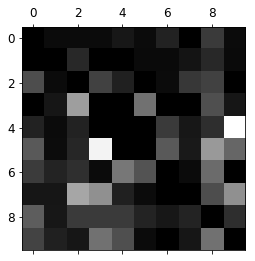

In [39]:
# Normalize each row so one class doesn't dominate the values, skewing the heatmap
# This is not strictly necessary in this case because MNIST classes are well-balanced
# It's good practice nevertheless
row_sums = conf_mx.sum(axis=1, keepdims=True)
conf_mx_misclassifications = conf_mx / row_sums

# Remove correct classifications (leaves only misclassifications in the matrix)
np.fill_diagonal(conf_mx_misclassifications, 0)  

plt.matshow(conf_mx_misclassifications, cmap=plt.cm.gray)
plt.show()

# Step 10: Build your best solution (and explain each step) 

## Use a separate notebook